# Testing agent in different limit-case configurations (spinup library)

In [7]:
import gym
from gym import spaces
from gym.utils import seeding
from gym.envs.registration import register

from ..custom_functions.custom_functions import env_fn 
from custom_functions.custom_functions import test_agent
from custom_functions.custom_functions import plot_test
from custom_functions.custom_functions import evaluate_control

import spinup

from os import path
from scipy.integrate import solve_ivp
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

#from vpython import *
from functools import partial

register(id='gyroscoperobustenv-v0', entry_point='gym_GyroscopeEnv.envs:GyroscopeRobustEnv')
register(id='gyroscopeenv-v0', entry_point='gym_GyroscopeEnv.envs:GyroscopeEnv')

ImportError: attempted relative import with no known parent package

#### Step

In [6]:
# Test paramaters
env_name = 'gyroscopeenv-v0'
reward_type = 'Normalized'
reward_args = {'k': 0.05, 'qx2' : 0.05, 'qx4' : 0.05, 'pu1':0.05,'pu2':0.05}
seed = 0
agent_path = 'td3_n_it2_an_var1_extralay_extralay_s0/'#'linearized controller'
init_state = [0,0,20*np.pi/180,0,0,20*np.pi/180,200*2*np.pi/60]
ep_len = 400
t_end = ep_len*0.05
x1_ref_seq = np.append(np.full(100,0),np.full(500,60*np.pi/180))
x3_ref_seq = np.append(np.full(100,20*np.pi/180),np.full(300,20*np.pi/180))

# Perform testing
_,_,x1_eval_td3,_,x3_eval_td3,_,x1_ref_eval_td3,x3_ref_eval_td3,_ = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)
_,_,x1_eval_lin,_,x3_eval_lin,_,x1_ref_eval_lin,x3_ref_eval_lin,_ = test_agent(env_name,reward_type,reward_args,seed,'linearized controller',init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)

Total cumulative reward: -120.29801622121404
Total cumulative reward: -35.01880873942759


In [7]:
time = np.linspace(0, t_end, len(x1_eval_td3))

plt.figure(figsize=(10,7))
plt.title(r'',fontsize=20, y=1.05)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel('Angular position [°]',fontsize=16)
plt.ylim([-20,100])
plt.xlim([0,20])
plt.grid()

# RL Agent
plt.plot(time,180*(x1_eval_td3)/np.pi,'r-',label=r'$\theta$ RL')
plt.plot(time,180*(x1_eval_lin)/np.pi,'r-', linestyle='dashed',label=r'$\theta$ FL')

# FL Agent
plt.plot(time,180*(x3_eval_td3)/np.pi,'b-',label=r'$\phi$ RL')
plt.plot(time,180*(x3_eval_lin)/np.pi,'b-', linestyle='dashed',label=r'$\phi$ FL')

# Reference
plt.plot(time, 180*x1_ref_eval_td3/np.pi, color='black',label=r'Reference on $\theta$')

plt.legend()
plt.savefig('track.pgf')

#### Multi step

In [4]:
# Test paramaters
env_name = 'gyroscopeenv-v0'
reward_type = 'Normalized'
reward_args = {'k': 0.05, 'qx2' : 0.05, 'qx4' : 0.05, 'pu1':0.05,'pu2':0.05}
seed = 0
agent_path = 'best_agent_robustified/'#'linearized controller'
init_state = [0,0,0*np.pi/180,0,0,0,200*2*np.pi/60]
ep_len = 800
t_end = ep_len*0.05
x1_ref_seq = np.append(np.full(100,0),np.full(300,60*np.pi/180))
x1_ref_seq = np.append(x1_ref_seq,np.full(300,-60*np.pi/180))
x1_ref_seq = np.append(x1_ref_seq,np.full(300,0*np.pi/180))
#x1_ref_seq = np.append(x1_ref_seq,np.full(400,1))
#x1_ref_seq = np.full(1000,0)+1*np.sin(np.linspace(0,6*np.pi,1000))
x3_ref_seq = np.append(np.full(100,0*np.pi/180),np.full(700,0*np.pi/180))

# Perform testing
_,_,x1_eval_td3,_,x3_eval_td3,_,x1_ref_eval_td3,x3_ref_eval_td3,_ = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)
_,_,x1_eval_lin,_,x3_eval_lin,_,x1_ref_eval_lin,x3_ref_eval_lin,_ = test_agent(env_name,reward_type,reward_args,seed,'linearized controller',init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Total cumulative reward: -365.8189061055496
Total cumulative reward: -189.5276608981765


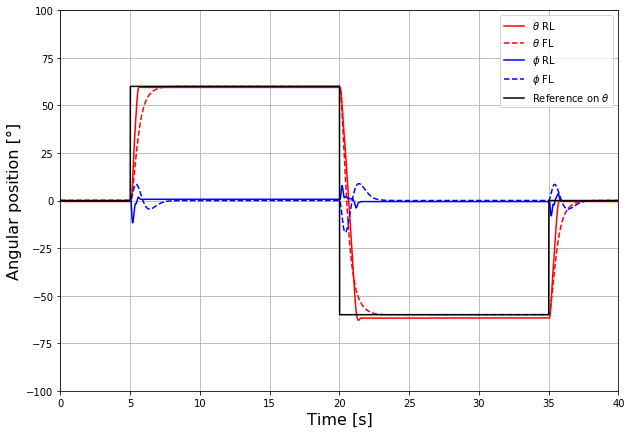

In [5]:
time = np.linspace(0, t_end, len(x1_eval_td3))

plt.figure(figsize=(10,7))
plt.title(r'',fontsize=20, y=1.05)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel('Angular position [°]',fontsize=16)
plt.ylim([-100,100])
plt.xlim([0,40])
plt.grid()

# RL Agent
plt.plot(time,180*(x1_eval_td3)/np.pi,'r-',label=r'$\theta$ RL')
plt.plot(time,180*(x1_eval_lin)/np.pi,'r-', linestyle='dashed',label=r'$\theta$ FL')

# FL Agent
plt.plot(time,180*(x3_eval_td3)/np.pi,'b-',label=r'$\phi$ RL')
plt.plot(time,180*(x3_eval_lin)/np.pi,'b-', linestyle='dashed',label=r'$\phi$ FL')

# Reference
plt.plot(time, 180*x1_ref_eval_td3/np.pi, color='black',label=r'Reference on $\theta$')

plt.legend()
plt.savefig('mtrack.pgf')

#### Sine

In [2]:
# Test paramaters
env_name = 'gyroscopeenv-v0'
reward_type = 'Normalized'
reward_args = {'k': 0.05, 'qx2' : 0.05, 'qx4' : 0.05, 'pu1':0.05,'pu2':0.05}
seed = 0
agent_path = 'best_agent_robustified/'#'linearized controller'
init_state = [0,0,0*np.pi/180,0,0,0,200*2*np.pi/60]
ep_len = 800
t_end = ep_len*0.05
x1_ref_seq = np.full(800,0)+1*np.sin(2*np.pi*0.1*np.linspace(0,t_end,800))
x3_ref_seq = np.append(np.full(100,0*np.pi/180),np.full(700,0*np.pi/180))

# Perform testing
_,_,x1_eval_td3,_,x3_eval_td3,_,x1_ref_eval_td3,x3_ref_eval_td3,_ = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)
_,_,x1_eval_lin,_,x3_eval_lin,_,x1_ref_eval_lin,x3_ref_eval_lin,_ = test_agent(env_name,reward_type,reward_args,seed,'linearized controller',init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Total cumulative reward: -475.00576004159535
Total cumulative reward: -843.4965486904281


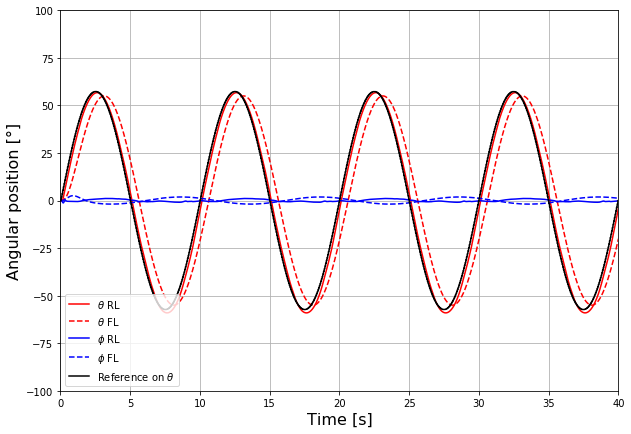

In [3]:
time = np.linspace(0, t_end, len(x1_eval_td3))

plt.figure(figsize=(10,7))
plt.title(r'',fontsize=20, y=1.05)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel('Angular position [°]',fontsize=16)
plt.ylim([-100,100])
plt.xlim([0,40])
plt.grid()

# RL Agent
plt.plot(time,180*(x1_eval_td3)/np.pi,'r-',label=r'$\theta$ RL')
plt.plot(time,180*(x1_eval_lin)/np.pi,'r-', linestyle='dashed',label=r'$\theta$ FL')

# FL Agent
plt.plot(time,180*(x3_eval_td3)/np.pi,'b-',label=r'$\phi$ RL')
plt.plot(time,180*(x3_eval_lin)/np.pi,'b-', linestyle='dashed',label=r'$\phi$ FL')

# Reference
plt.plot(time, 180*x1_ref_eval_td3/np.pi, color='black',label=r'Reference on $\theta$')

plt.legend()
plt.savefig('sinetrack.pgf')

#### Comparing reward relative importance with reward function

In [12]:
gamma = 0.995
gamma_pow = [gamma**t for t in range(ep_len)]

In [13]:
# Test paramaters
env_name = 'gyroscopeenv-v0'
seed = 0
agent_path = 'ddpg_n'
init_state = [0,0,20*np.pi/180,0,0,0,200*2*np.pi/60]
ep_len = 300
t_end = ep_len*0.05
x1_ref_seq = np.append(np.full(100,60*np.pi/180),np.full(200,60*np.pi/180))
x3_ref_seq = np.append(np.full(100,20*np.pi/180),np.full(200,20*np.pi/180))

# Perform testing
reward_type = 'Normalized'
reward_args = {'k': 0.25, 'qx2' : 0.05, 'qx4' : 0.05, 'pu1':0.05,'pu2':0.05}
r_n,_,x1_eval,_,x3_eval,_,x1_ref_eval,x3_ref_eval,_ = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)

reward_type = 'Absolute'
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.5,'pu2':0.5}
r_a,_,x1_eval,_,x3_eval,_,x1_ref_eval,x3_ref_eval,_ = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)

reward_type = 'Quadratic'
reward_args = {'qx1':9,'qx2':0.05,'qx3':9,'qx4':0.05,'pu1':0.1,'pu2':0.1}
r_q,_,x1_eval,_,x3_eval,_,x1_ref_eval,x3_ref_eval,_ = test_agent(env_name,reward_type,reward_args,seed,agent_path,init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq)


# Calculate relative importance
r_n_c = [0]
for t in range(ep_len):
    r_n_c.append(r_n_c[-1]+r_n[t]*gamma**t)

r_a_c = [0]
for t in range(ep_len):
    r_a_c.append(r_a_c[-1]+r_a[t]*gamma**t)

r_q_c = [0]
for t in range(ep_len):
    r_q_c.append(r_q_c[-1]+r_q[t]*gamma**t)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Total cumulative reward: -113.85846200337872
Total cumulative reward: -437.64686275679753
Total cumulative reward: -128.41019421483682


In [14]:
time = np.linspace(0, t_end, len(r_n))

plt.figure(figsize=(10,7))
plt.title(r'',fontsize=20, y=1.05)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel(r'Normalized $R^{\gamma}(t)$ [-]',fontsize=16)
plt.ylim([0,1])
plt.xlim([0,15])
plt.grid()

# RL Agent
plt.plot(time,r_q_c[1:]/r_q_c[-1],'g',label='Q')
plt.plot(time,r_a_c[1:]/r_a_c[-1],'b',label='A')
plt.plot(time,r_n_c[1:]/r_n_c[-1],'r',label='N')

plt.legend()
plt.savefig('cumrew.pgf')

#### Simulation verification 

In [3]:
import matplotlib as matplt
matplt.use("pgf")
matplt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,})

In [8]:
Jbx1 = 0.0019
Jbx2 = 0.0008
Jbx3 = 0.0012
Jrx1 = 0.0179
Jdx1 = 0.0028
Jdx3 = 0.0056
param =  {'Jbx1':Jbx1,'Jbx2':Jbx2,'Jbx3':Jbx3,'Jrx1':Jrx1,'Jdx1':Jdx1,'Jdx3':Jdx3,'fvr':0.0027,'fcr':0.00,'fvb':0.0053,'fcb':0.00}

In [9]:
# Test paramaters
env_name = 'gyroscoperobustenv-v0'
reward_type = 'Normalized'
reward_args = {'k': 0.05, 'qx2' : 0.05, 'qx4' : 0.05, 'pu1':0.05,'pu2':0.05}
seed = 0
init_state = [0,0,0*np.pi/180,0,45*np.pi/180,-60*np.pi/180,300*2*np.pi/60]
ep_len = 400
t_end = ep_len*0.05
x1_ref_seq = np.append(np.full(100,0),np.full(300,45*np.pi/180))
x3_ref_seq = np.append(np.full(100,0),np.full(300,-60*np.pi/180))

# Perform testing
_,_,x1_eval_lin,x2_eval_lin,x3_eval_lin,x4_eval_lin,x1_ref_eval_lin,x3_ref_eval_lin,_ = test_agent(env_name,reward_type,reward_args,seed,'linearized controller',init_state,t_end,ep_len,x1_ref_seq,x3_ref_seq,param=param, is_noise=False)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Total cumulative reward: -60.42749018105996


In [10]:
time = np.linspace(0, t_end, len(x1_eval_lin))

plt.figure(figsize=(10,7))
plt.title(r'',fontsize=20, y=1.05)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel('Angular position [°]',fontsize=16)
plt.ylim([-80,100])
plt.xlim([0,20])
plt.grid()

# RL Agent
plt.plot(time,180*(x1_eval_lin)/np.pi,'r-',label=r'$\theta$')

# FL Agent
plt.plot(time,180*(x3_eval_lin)/np.pi,'b-',label=r'$\phi$')

# Reference
plt.plot(time, 180*x1_ref_eval_lin/np.pi, color='black',label=r'Reference on $\theta$')
plt.plot(time, 180*x3_ref_eval_lin/np.pi, color='black',label=r'Reference on $\phi$',linestyle='dashed')

plt.legend()
plt.savefig('validang.pgf')

In [11]:
time = np.linspace(0, t_end, len(x1_eval_lin))

plt.figure(figsize=(10,7))
plt.title(r'',fontsize=20, y=1.05)
plt.xlabel('Time [s]',fontsize=16)
plt.ylabel('Velocity [RPM]',fontsize=16)
plt.ylim([-15,15])
plt.xlim([0,20])
plt.grid()

# RL Agent
plt.plot(time,60*(x2_eval_lin)/(2*np.pi),'r-',label=r'$\dot{\theta}$')

# FL Agent
plt.plot(time,60*(x4_eval_lin)/(2*np.pi),'b-',label=r'$\dot{\phi}$')


plt.legend()
plt.savefig('validvel.pgf')

#### Metrics

In [4]:
# Init dataframe
env_name = 'gyroscopeenv-v0'
agent_paths = ['td3_n_it2_an_var1_extralay_extralay_s0/','linearized controller']
ss_bound = 0.05

# Loop dataframe
for idx, agent_path in zip(range(len(agent_paths)),agent_paths):
    if idx == 0:
        metrics = evaluate_control(env_name,agent_path,ss_bound)
    else:
        new_metrics = evaluate_control(env_name,agent_path,ss_bound)
        metrics = metrics.append(new_metrics)

/home/matthieulc/Documents/MA2/DRLGyro/resources/drlgyroenv/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [5]:
metrics_man = metrics.transpose()
metrics_man = metrics_man.round(4)
metrics_man

Config.,td3_n_it2_an_var1_extralay_extralay_s0/,linearized controller
$\theta$ MAE (rad),0.1711,0.2434
$\phi$ MAE (rad),0.1606,0.2931
$\theta$ MSSE (rad),0.0080,0.0000
$\phi$ MSSE (rad),0.0132,0.0000
$\theta$ in bounds (%),100.0000,100.0000
$\phi$ in bounds (%),100.0000,100.0000
$\theta$ unsteady (%),0.0000,0.0000
$\phi$ unsteady (%),0.0000,0.0000
$\theta$ rise time (s),0.5926,1.0279
$\phi$ rise time (s),0.4537,0.9911


In [6]:
# To LaTex
print(metrics_man.to_latex(escape=False))

\begin{tabular}{lrr}
\toprule
Config. &  td3_n_it2_an_var1_extralay_extralay_s0/ &  linearized controller \\
\midrule
$\theta$ MAE (rad)         &                                   0.1711 &                 0.2434 \\
$\phi$ MAE (rad)           &                                   0.1606 &                 0.2931 \\
$\theta$ MSSE (rad)        &                                   0.0080 &                 0.0000 \\
$\phi$ MSSE (rad)          &                                   0.0132 &                 0.0000 \\
$\theta$ in bounds (%)     &                                 100.0000 &               100.0000 \\
$\phi$ in bounds (%)       &                                 100.0000 &               100.0000 \\
$\theta$ unsteady (%)      &                                   0.0000 &                 0.0000 \\
$\phi$ unsteady (%)        &                                   0.0000 &                 0.0000 \\
$\theta$ rise time (s)     &                                   0.5926 &                 1.0279 \\
